# Religion

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read-in data

In [2]:
rel = pd.read_excel('../Data/religion_gi.xlsx')

In [3]:
rel.rename(columns={'Lower tier local authorities Code': 'LA_code', 'Lower tier local authorities': 'LA_name', 'Gender identity (4 categories) Code': 'GI_code', 'Gender identity (4 categories)': 'GI_categories', 'Religion (10 categories) Code': 'Religion_code', 'Religion (10 categories)': 'Religion_categories'}, inplace=True)

In [4]:
rel = rel[(rel.GI_code != -8) & (rel.Religion_code != -8)]

In [5]:
rel

,LA_code,LA_name,GI_code,GI_categories,Religion_code,Religion_categories,Observation
11,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,1,No religion,26470
12,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,2,Christian,40406
13,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,3,Buddhist,145
14,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,4,Hindu,132
15,E06000001,Hartlepool,1,Gender identity the same as sex registered at ...,5,Jewish,19
...,...,...,...,...,...,...,...
13235,W06000024,Merthyr Tydfil,3,Not answered,5,Jewish,0
13236,W06000024,Merthyr Tydfil,3,Not answered,6,Muslim,16
13237,W06000024,Merthyr Tydfil,3,Not answered,7,Sikh,6
13238,W06000024,Merthyr Tydfil,3,Not answered,8,Other religion,10


# Analysis

In [6]:
import pandas as pd

# Assume 'rel' is your dataframe
total_population = rel.groupby('LA_name')['Observation'].sum().reset_index(name='Total_Observation')

# Create a dataframe to store the results
final_df = total_population.copy()

for rel_category in rel['Religion_categories'].unique():
    spec = rel[rel.Religion_categories == rel_category]
    spec_tot = spec.groupby('LA_name')['Observation'].sum().reset_index(name=f'{rel_category}_Observation')
    spec_tot[f'{rel_category}_Percentage'] = (spec_tot[f'{rel_category}_Observation'] / total_population['Total_Observation'] * 100).round(2)
    final_df = pd.merge(final_df, spec_tot[['LA_name', f'{rel_category}_Percentage', f'{rel_category}_Observation']], on = 'LA_name', how = 'left')

# Print the final_df to see the results
final_df


,LA_name,Total_Observation,No religion_Percentage,No religion_Observation,Christian_Percentage,Christian_Observation,Buddhist_Percentage,Buddhist_Observation,Hindu_Percentage,Hindu_Observation,Jewish_Percentage,Jewish_Observation,Muslim_Percentage,Muslim_Observation,Sikh_Percentage,Sikh_Observation,Other religion_Percentage,Other religion_Observation,Not answered_Percentage,Not answered_Observation
0,Adur,52957,44.80,23725,46.37,24557,0.48,256,0.32,170,0.41,215,1.16,615,0.06,33,0.69,366,5.70,3020
1,Allerdale,80514,31.21,25128,62.11,50010,0.25,205,0.07,57,0.04,33,0.22,175,0.02,20,0.35,285,5.71,4601
2,Amber Valley,105063,44.01,46233,48.84,51317,0.25,261,0.17,178,0.05,55,0.23,246,0.19,203,0.65,685,5.60,5885
3,Arun,139556,37.21,51925,54.87,76574,0.34,469,0.22,303,0.18,246,0.62,866,0.05,64,0.59,822,5.94,8287
4,Ashfield,102846,46.61,47936,45.74,47039,0.23,236,0.30,312,0.04,39,0.50,518,0.22,223,0.54,557,5.82,5986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Wrexham,110273,38.97,42968,52.58,57980,0.33,361,0.24,264,0.05,50,0.98,1077,0.06,66,0.43,470,6.38,7037
327,Wychavon,110719,32.75,36263,60.11,66551,0.28,309,0.14,157,0.10,108,0.51,568,0.23,256,0.47,517,5.41,5990
328,Wyre,94350,31.13,29371,62.53,58994,0.30,280,0.14,128,0.08,80,0.35,331,0.02,19,0.47,446,4.98,4701
329,Wyre Forest,84561,35.74,30225,56.66,47913,0.25,214,0.13,112,0.05,40,0.78,661,0.24,206,0.52,441,5.62,4749


In [7]:
# Let's see if this checks out

final_df.sort_values(by = 'Muslim_Percentage', ascending = False)

,LA_name,Total_Observation,No religion_Percentage,No religion_Observation,Christian_Percentage,Christian_Observation,Buddhist_Percentage,Buddhist_Observation,Hindu_Percentage,Hindu_Observation,Jewish_Percentage,Jewish_Observation,Muslim_Percentage,Muslim_Observation,Sikh_Percentage,Sikh_Observation,Other religion_Percentage,Other religion_Observation,Not answered_Percentage,Not answered_Observation
292,Tower Hamlets,252880,30.20,76370,24.02,60742,1.11,2802,2.20,5561,0.49,1249,33.89,85700,0.33,847,0.61,1542,7.14,18067
19,Blackburn with Darwen,119515,21.19,25326,41.44,49527,0.20,240,0.34,406,0.03,40,31.45,37585,0.09,110,0.34,411,4.91,5870
184,Newham,276173,15.83,43710,37.08,102412,0.70,1941,6.42,17717,0.14,382,30.91,85363,1.68,4643,0.56,1559,6.68,18446
161,Luton,172698,18.28,31567,40.94,70698,0.33,578,3.58,6175,0.14,235,28.73,49611,1.36,2343,0.58,998,6.08,10493
213,Redbridge,242020,13.13,31778,32.42,78469,0.57,1377,11.31,27363,2.40,5809,27.87,67446,5.95,14399,0.68,1655,5.67,13724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Hambleton,76981,31.95,24594,61.72,47511,0.23,180,0.11,82,0.06,48,0.20,153,0.03,24,0.40,307,5.30,4082
192,North Norfolk,89146,36.45,32494,55.65,49613,0.40,357,0.07,58,0.13,119,0.17,148,0.02,16,0.69,611,6.43,5730
291,Torridge,57558,40.25,23167,51.96,29909,0.35,200,0.05,26,0.07,41,0.14,81,0.03,16,0.72,412,6.44,3706
172,Mid Devon,68202,41.71,28446,50.85,34683,0.34,234,0.12,83,0.07,50,0.14,96,0.03,22,0.72,489,6.01,4099


In [8]:
non_response_data = rel[rel.GI_categories == 'Not answered']

In [9]:
non_resp_totals = non_response_data.groupby(['LA_name', 'Religion_categories'])['Observation'].sum().reset_index(name='Non_Response_Observation')


In [10]:
non_resp_totals

,LA_name,Religion_categories,Non_Response_Observation
0,Adur,Buddhist,10
1,Adur,Christian,728
2,Adur,Hindu,1
3,Adur,Jewish,2
4,Adur,Muslim,31
...,...,...,...
2974,York,Muslim,88
2975,York,No religion,2190
2976,York,Not answered,5537
2977,York,Other religion,88


In [11]:
# Create a copy of non_resp_totals to store the results
non_resp_results = non_resp_totals.copy()

# Merge the Non_Response_Observation and Total_Observation columns
merged_df = pd.merge(non_resp_totals, final_df[['LA_name', 'Total_Observation']], on='LA_name', how='left')

In [12]:
# Create a copy of non_resp_totals to store the results
non_resp_results = non_resp_totals.copy()

# Merge the Non_Response_Observation and Total_Observation columns
merged_df = pd.merge(non_resp_totals, final_df[['LA_name', 'Total_Observation']], on='LA_name', how='left')

# Calculate the percentage for each religion category
merged_df['NR_Percentage'] = (merged_df['Non_Response_Observation'] / merged_df['Total_Observation'] * 100).round(2)

# Pivot the dataframe to create the columns for each religion category
pivot_df = pd.pivot_table(merged_df, values='NR_Percentage', index='LA_name', columns='Religion_categories', fill_value=0)
pivot_df.columns = [f'{col}_NR' for col in pivot_df.columns]

# Merge the pivot_df with the final_df
final_df = pd.merge(final_df, pivot_df.reset_index(), on='LA_name', how='left')


In [13]:
final_df.sort_values(by = 'Muslim_NR', ascending = False)

,LA_name,Total_Observation,No religion_Percentage,No religion_Observation,Christian_Percentage,Christian_Observation,Buddhist_Percentage,Buddhist_Observation,Hindu_Percentage,Hindu_Observation,...,Not answered_Observation,Buddhist_NR,Christian_NR,Hindu_NR,Jewish_NR,Muslim_NR,No religion_NR,Not answered_NR,Other religion_NR,Sikh_NR
19,Blackburn with Darwen,119515,21.19,25326,41.44,49527,0.20,240,0.34,406,...,5870,0.01,1.46,0.03,0.00,2.73,0.82,2.28,0.03,0.01
161,Luton,172698,18.28,31567,40.94,70698,0.33,578,3.58,6175,...,10493,0.02,2.02,0.25,0.02,2.62,0.85,3.23,0.05,0.10
27,Bradford,421569,27.98,117953,37.22,156918,0.21,886,0.94,3967,...,22570,0.01,1.46,0.07,0.00,2.51,0.96,2.47,0.03,0.06
184,Newham,276173,15.83,43710,37.08,102412,0.70,1941,6.42,17717,...,18446,0.05,2.36,0.45,0.01,2.36,0.75,3.85,0.06,0.10
206,Pendle,75222,28.73,21608,42.90,32268,0.28,213,0.09,66,...,3951,0.02,1.56,0.00,0.00,2.32,1.02,2.40,0.04,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Allerdale,80514,31.21,25128,62.11,50010,0.25,205,0.07,57,...,4601,0.01,1.62,0.00,0.00,0.01,0.91,2.02,0.03,0.00
144,Isles of Scilly,1733,43.28,750,49.80,863,0.17,3,0.06,1,...,108,0.00,1.33,0.00,0.00,0.00,1.15,2.19,0.00,0.00
172,Mid Devon,68202,41.71,28446,50.85,34683,0.34,234,0.12,83,...,4099,0.02,1.76,0.01,0.00,0.00,1.28,2.36,0.05,0.00
309,West Devon,48360,39.00,18860,53.12,25687,0.42,201,0.06,28,...,2991,0.03,1.85,0.00,0.01,0.00,1.32,2.26,0.08,0.00


## Graph

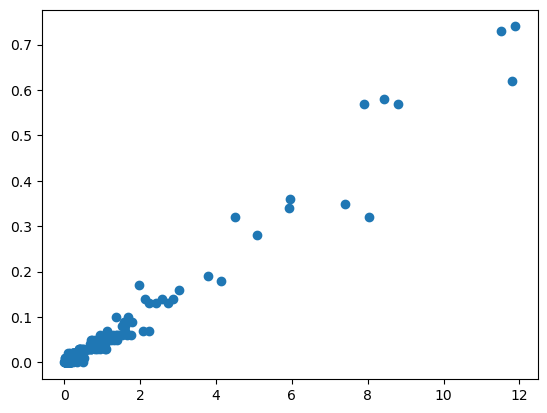

In [14]:
plt.scatter(final_df['Sikh_Percentage'], final_df['Sikh_NR'])

In [ ]:
non_resp_muslim = rel[(rel.GI_categories == 'Not answered') & (rel.Religion_categories == 'Muslim')].reset_index(drop = True)

In [ ]:
non_resp_muslim = non_resp_muslim.sort_values(by = 'LA_name').reset_index(drop = True)

In [ ]:
non_resp_muslim

In [ ]:
grouped = rel.groupby(['LA_name', 'Religion_categories'])['Observation'].sum().reset_index()

In [ ]:
grouped_m = grouped[grouped.Religion_categories == 'Muslim'].reset_index(drop = True)

In [ ]:
grouped_m

In [ ]:
non_resp_muslim

In [ ]:
grouped_m['NR_rate'] = non_resp_muslim['Observation'] / grouped_m['Observation'] * 100

In [19]:
merged_df2

,LA_name,Religion_categories,Non_Response_Observation,Total_Observation_Religion,NR_rate
0,Adur,Buddhist,10,256,3.91
1,Adur,Christian,728,24557,2.96
2,Adur,Hindu,1,170,0.59
3,Adur,Jewish,2,215,0.93
4,Adur,Muslim,31,615,5.04
...,...,...,...,...,...
2974,York,Muslim,88,1892,4.65
2975,York,No religion,2190,76460,2.86
2976,York,Not answered,5537,11786,46.98
2977,York,Other religion,88,1170,7.52


In [20]:

# Assume 'rel' is your dataframe

# Create dataframe to store the results
final = pd.DataFrame()

# Group by 'LA_name' and 'Religion_categories', and get total observations for each group
grouped = rel.groupby(['LA_name', 'Religion_categories'])['Observation'].sum().reset_index(name='Total_Observation_Religion')

# Filter rows where GI_categories is 'Not answered'
non_response_data = rel[rel.GI_categories == 'Not answered']

# Group by 'LA_name' and 'Religion_categories', and get non-response observations for each group
non_response_grouped = non_response_data.groupby(['LA_name', 'Religion_categories'])['Observation'].sum().reset_index(name='Non_Response_Observation')

# Merge the Total_Observation_Religion and Non_Response_Observation columns
merged_df2 = pd.merge(non_response_grouped, grouped, on=['LA_name', 'Religion_categories'], how='left')

# Calculate the non-response rate for each religion category
merged_df2['NR_rate'] = (merged_df2['Non_Response_Observation'] / merged_df2['Total_Observation_Religion'] * 100).round(2)

# Pivot the dataframe to create the columns for each religion category
pivot_df = pd.pivot_table(merged_df2, values='NR_rate', index='LA_name', columns='Religion_categories', fill_value=0)
pivot_df.columns = [f'{col}_NR' for col in pivot_df.columns]

# Merge the pivot_df with the final
final = pd.merge(final, pivot_df.reset_index(), on='LA_name', how='right')

# Print the final to see the results
final


KeyError: 'LA_name'

In [21]:
import pandas as pd

# Assume 'rel' is your dataframe

# Group by 'LA_name' and 'Religion_categories', and get total observations for each group
grouped = rel.groupby(['LA_name', 'Religion_categories'])['Observation'].sum().reset_index(name='Total_Observation_Religion')

# Filter rows where GI_categories is 'Not answered'
non_response_data = rel[rel.GI_categories == 'Not answered']

# Group by 'LA_name' and 'Religion_categories', and get non-response observations for each group
non_response_grouped = non_response_data.groupby(['LA_name', 'Religion_categories'])['Observation'].sum().reset_index(name='Non_Response_Observation')

# Merge the Total_Observation_Religion and Non_Response_Observation columns
merged_df = pd.merge(non_response_grouped, grouped, on=['LA_name', 'Religion_categories'], how='left')

# Calculate the non-response rate for each religion category
merged_df['NR_rate'] = (merged_df['Non_Response_Observation'] / merged_df['Total_Observation_Religion'] * 100).round(2)

# Pivot the dataframe to create the columns for each religion category
pivot_df = pd.pivot_table(merged_df, values='NR_rate', index='LA_name', columns='Religion_categories', fill_value=0)
pivot_df.columns = [f'{col}_NR' for col in pivot_df.columns]

pivot_df.reset_index(inplace=True)

# Print the pivot_df to see the results
print(pivot_df)


          LA_name  Buddhist_NR  Christian_NR  Hindu_NR  Jewish_NR  Muslim_NR  \
0            Adur         3.91          2.96      0.59       0.93       5.04   
1       Allerdale         3.90          2.61      3.51       3.03       6.86   
2    Amber Valley         6.90          3.72      1.69       1.82       5.69   
3            Arun         7.46          3.52      9.24       3.66       6.70   
4        Ashfield        11.02          3.86      7.05       7.69       9.07   
..            ...          ...           ...       ...        ...        ...   
326       Wrexham         4.71          4.70      5.68      14.00       9.38   
327      Wychavon         7.44          3.16      2.55       0.93       6.69   
328          Wyre         5.36          2.77      3.12       5.00       7.55   
329   Wyre Forest         5.61          3.81      1.79       2.50       6.96   
330          York         3.64          2.91      5.44       4.44       4.65   

     No religion_NR  Not answered_NR  O

In [22]:
pivot_df

,LA_name,Buddhist_NR,Christian_NR,Hindu_NR,Jewish_NR,Muslim_NR,No religion_NR,Not answered_NR,Other religion_NR,Sikh_NR
0,Adur,3.91,2.96,0.59,0.93,5.04,2.82,33.81,3.55,3.03
1,Allerdale,3.90,2.61,3.51,3.03,6.86,2.93,35.27,7.72,20.00
2,Amber Valley,6.90,3.72,1.69,1.82,5.69,2.99,39.66,6.72,4.93
3,Arun,7.46,3.52,9.24,3.66,6.70,3.09,37.35,7.42,7.81
4,Ashfield,11.02,3.86,7.05,7.69,9.07,3.37,37.14,6.10,6.73
...,...,...,...,...,...,...,...,...,...,...
326,Wrexham,4.71,4.70,5.68,14.00,9.38,4.52,40.61,7.87,9.09
327,Wychavon,7.44,3.16,2.55,0.93,6.69,2.84,35.46,7.16,1.56
328,Wyre,5.36,2.77,3.12,5.00,7.55,3.00,37.29,6.50,0.00
329,Wyre Forest,5.61,3.81,1.79,2.50,6.96,3.51,37.12,5.44,6.31


In [25]:
pivot_df

,LA_name,Buddhist_NR,Christian_NR,Hindu_NR,Jewish_NR,Muslim_NR,No religion_NR,Not answered_NR,Other religion_NR,Sikh_NR
0,Adur,3.91,2.96,0.59,0.93,5.04,2.82,33.81,3.55,3.03
1,Allerdale,3.90,2.61,3.51,3.03,6.86,2.93,35.27,7.72,20.00
2,Amber Valley,6.90,3.72,1.69,1.82,5.69,2.99,39.66,6.72,4.93
3,Arun,7.46,3.52,9.24,3.66,6.70,3.09,37.35,7.42,7.81
4,Ashfield,11.02,3.86,7.05,7.69,9.07,3.37,37.14,6.10,6.73
...,...,...,...,...,...,...,...,...,...,...
326,Wrexham,4.71,4.70,5.68,14.00,9.38,4.52,40.61,7.87,9.09
327,Wychavon,7.44,3.16,2.55,0.93,6.69,2.84,35.46,7.16,1.56
328,Wyre,5.36,2.77,3.12,5.00,7.55,3.00,37.29,6.50,0.00
329,Wyre Forest,5.61,3.81,1.79,2.50,6.96,3.51,37.12,5.44,6.31


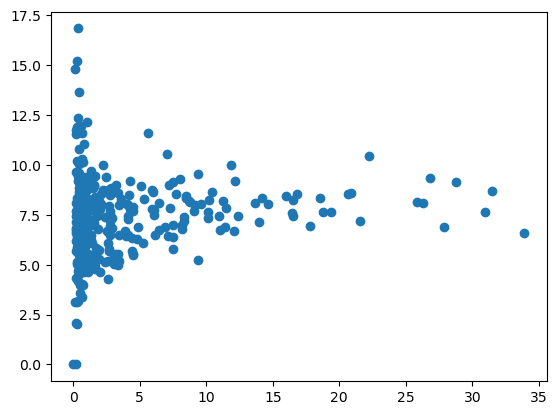

In [26]:
plt.scatter(final_df['Muslim_Percentage'], pivot_df['Muslim_NR'])

In [35]:

correlation = final_df['Muslim_Percentage'].corr(pivot_df['Muslim_NR'])
print(f"Pearson correlation: {correlation:.2f}")

# Calculate the Spearman


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Pearson correlation: 0.13


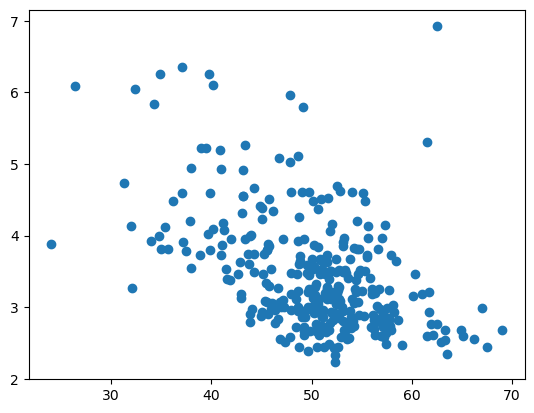

In [27]:
plt.scatter(final_df['Christian_Percentage'], pivot_df['Christian_NR'])

In [36]:

correlation = final_df['Christian_Percentage'].corr(pivot_df['Christian_NR'])
print(f"Pearson correlation: {correlation:.2f}")

# Calculate the Spearman


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Pearson correlation: -0.49


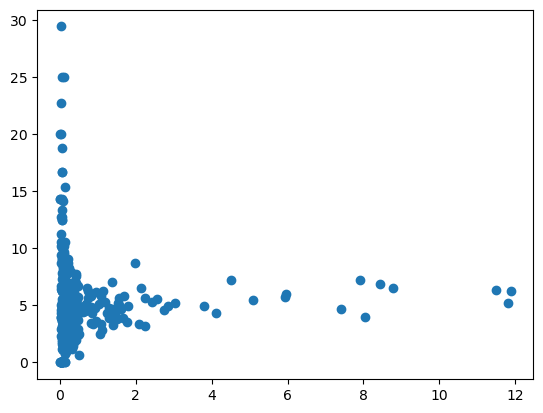

In [29]:
plt.scatter(final_df['Sikh_Percentage'], pivot_df['Sikh_NR'])

In [37]:

correlation = final_df['No religion_Percentage'].corr(pivot_df['No religion_NR'])
print(f"Pearson correlation: {correlation:.2f}")

# Calculate the Spearman


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Pearson correlation: -0.42


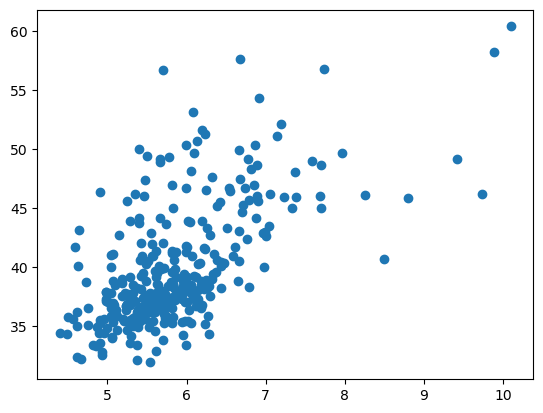

In [34]:
plt.scatter(final_df['Not answered_Percentage'], pivot_df['Not answered_NR'])

In [38]:

correlation = final_df['Not answered_Percentage'].corr(pivot_df['Not answered_NR'])
print(f"Pearson correlation: {correlation:.2f}")

# Calculate the Spearman


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Pearson correlation: 0.62
